+ V3

In [74]:
import matplotlib.pyplot as plt

def activity_2(diameter, load, temp, gravity, atmosphere_pressure, people):
    new_load = add_persons(people, load)    
    #print("Peso = ",new_load)
    air_pressure = atmosphere_pressure - ((6*new_load)/(gravity*3.14*(diameter**3)))
    temp_air = ((temp*atmosphere_pressure)/air_pressure)
    return [air_pressure, temp_air]

def temp_converter(temp, temp_scale):
    if temp_scale == 'fahrenheit':
        converted_temp = ((temp - 32) * (5/9)) + 273
        return converted_temp
    elif temp_scale == 'celsius':
        converted_temp = temp + 273
        return converted_temp
    elif temp_scale == 'kelvin':
        return temp
    else:
        return False

def kilogram_to_newton(weight):
    newton = weight/0.10197
    return newton

def add_persons(persons_newton, load):
    new_persons_newton = kilogram_to_newton(69 ) * persons_newton
    new_load = new_persons_newton + load
    return new_load

def otimizacao(diameter, load, temp, gravity, atmosphere_pressure, people):
    pressures = []
    temperatures = []
    diameters = []

    diameter = 1
    prev_temp_air = None
    prev_press_air = None

    while True:
        air_pressure, temp_air = activity_2(diameter, load, temp, gravity, atmosphere_pressure, people)
        pressures.append(air_pressure)
        temperatures.append(temp_air)
        diameters.append(diameter)
        
        if prev_press_air is not None and (abs(air_pressure - prev_press_air) <= 0.05):
            if prev_temp_air is not None and (abs(temp_air - prev_temp_air) <= 10):
                break
        
        prev_temp_air = temp_air
        prev_press_air = air_pressure
        diameter += 1

    return diameter,temp_air



diameter = 15
load = 2670
temperature = 288
temp_scale = "Kelvin"
temp_scale = temp_scale.lower()
gravity = 9.81 
atmosphere_pressure = 1.227
people = range(6)  # De 0 a 5

converted_temp = temp_converter(temperature, temp_scale)

+ Gráfico Aumentando Quantidade de Pessoas

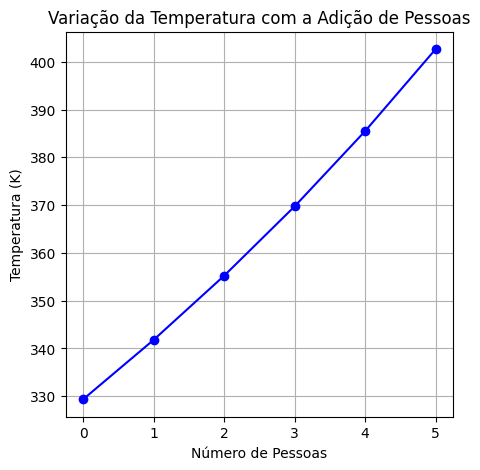

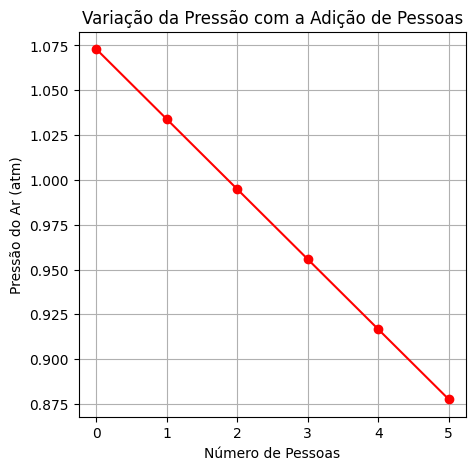

In [75]:
pressures = []
temperatures = []

for i in range(6):
    air_pressure, temp_air = activity_2(diameter, load, converted_temp, gravity, atmosphere_pressure, i)
    pressures.append(air_pressure)
    temperatures.append(temp_air)
    #print(temp_air, " - ",i)

plt.figure(figsize=(5, 5))
plt.plot(people, temperatures, marker='o', color='blue')
plt.xlabel('Número de Pessoas')
plt.ylabel('Temperatura (K)')
plt.title('Variação da Temperatura com a Adição de Pessoas')
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 5))
plt.plot(people, pressures, marker='o', color='red')
plt.title('Variação da Pressão com a Adição de Pessoas')
plt.xlabel('Número de Pessoas')
plt.ylabel('Pressão do Ar (atm)')
plt.grid(True)
plt.show()

+ Gráfico Variando o Tamanho do Balão 

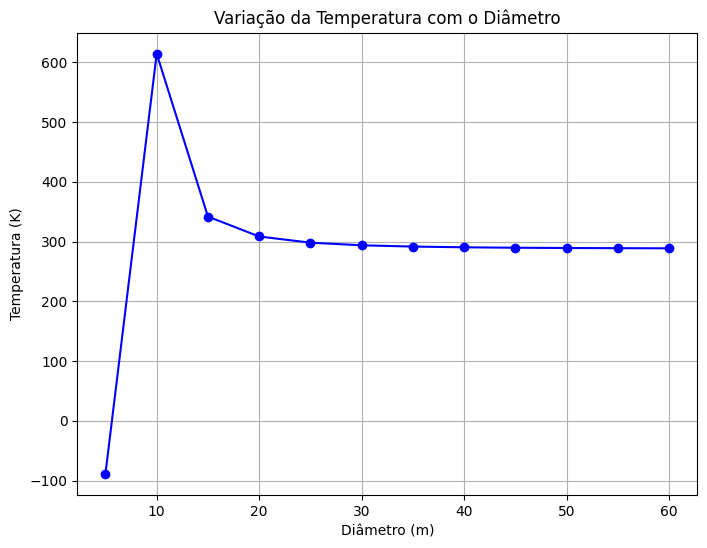

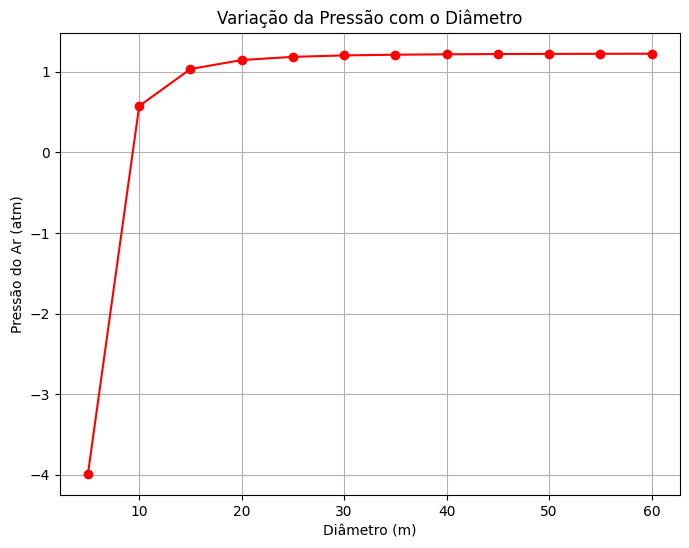

In [76]:
diameters = range(5, 61, 5)
pressures = []
temperatures = []

for diameter in diameters:
    result = activity_2(diameter, load, converted_temp, gravity, atmosphere_pressure, 1)
    pressures.append(result[0])
    temperatures.append(result[1])


plt.figure(figsize=(8, 6))
plt.plot(diameters, temperatures, marker='o', color='blue')
plt.title('Variação da Temperatura com o Diâmetro')
plt.xlabel('Diâmetro (m)')
plt.ylabel('Temperatura (K)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(diameters, pressures, marker='o', color='red')
plt.title('Variação da Pressão com o Diâmetro')
plt.xlabel('Diâmetro (m)')
plt.ylabel('Pressão do Ar (atm)')
plt.grid(True)
plt.show()

+ Otimização do Diâmetro

Diâmetro usado: 16


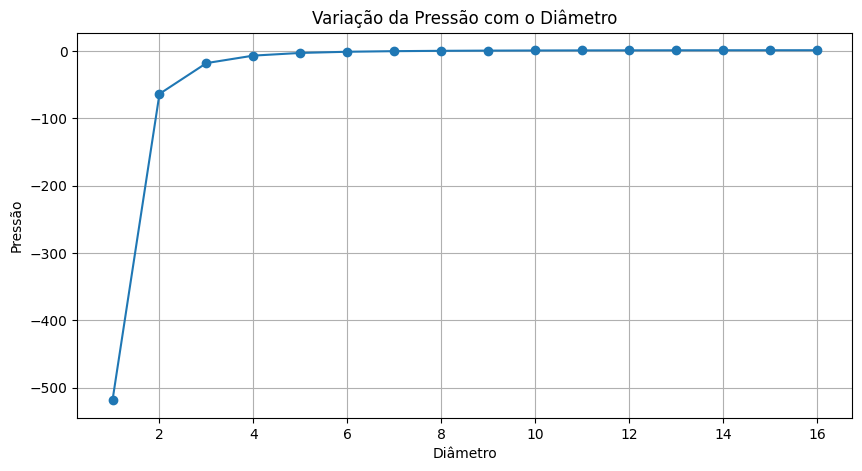

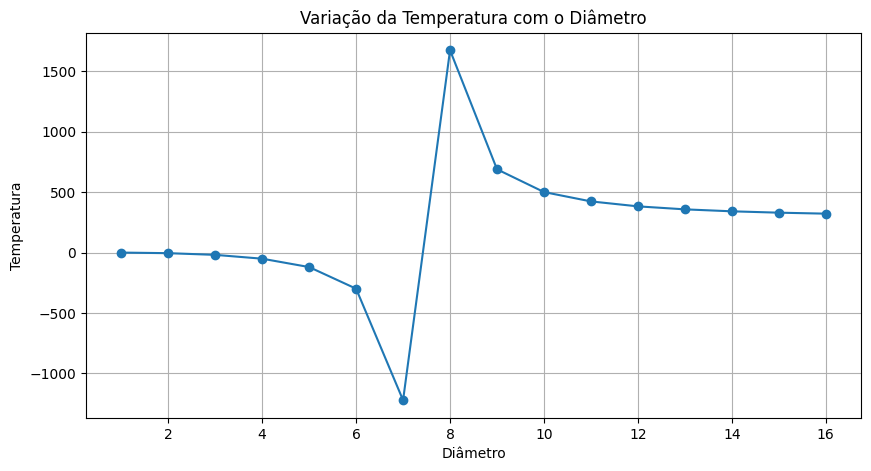

In [77]:
pressures = []
temperatures = []
diameters = []

diameter = 1
prev_temp_air = None
prev_press_air = None

while True:
    air_pressure, temp_air = activity_2(diameter, load, converted_temp, gravity, atmosphere_pressure, 0)
    pressures.append(air_pressure)
    temperatures.append(temp_air)
    diameters.append(diameter)
    
    if prev_press_air is not None and (abs(air_pressure - prev_press_air) <= 0.05):
        if prev_temp_air is not None and (abs(temp_air - prev_temp_air) <= 10):
            break
    
    prev_temp_air = temp_air
    prev_press_air = air_pressure
    diameter += 1

print("Diâmetro usado:", diameter)
#print("Diametros:",diameters)
#print("Temperaturas:",temperatures)
#print("Pressões:",pressures)

plt.figure(figsize=(10, 5))
plt.plot(diameters, pressures, marker='o', linestyle='-')
plt.title('Variação da Pressão com o Diâmetro')
plt.xlabel('Diâmetro')
plt.ylabel('Pressão')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(diameters, temperatures, marker='o', linestyle='-')
plt.title('Variação da Temperatura com o Diâmetro')
plt.xlabel('Diâmetro')
plt.ylabel('Temperatura')
plt.grid(True)
plt.show()

+ 1) Considerando 1 pessoa extra no cesto, qual o valor do diâmetro do balão que minimiza o Custo Total? (apresente o resultado com 4 casas decimais);

In [78]:
diam, temp = otimizacao(diameter, load, converted_temp, gravity, atmosphere_pressure, 1) 
custo_total = 50 * (temp-273) + 200*diam

print("Diâmetro: {:.4f}".format(diam))
print("Custo Total: {:.4f}".format(custo_total))

Diâmetro: 17.0000
Custo Total: 5895.9766


+ 2) Considerando 3 pessoas extras no cesto, obtenha qual o valor do diâmetro do balão que minimiza o Custo Total? 


In [79]:
diam, temp = otimizacao(diameter, load, converted_temp, gravity, atmosphere_pressure, 3) 
custo_total = 50 * (temp-273) + 200*diam

print("Diâmetro: {:.4f}".format(diam))
print("Custo Total: {:.4f}".format(custo_total))

Diâmetro: 18.0000
Custo Total: 6462.5296


+ 3) Considerando 5 pessoas extras no cesto, obtenha qual o valor do diâmetro do balão que minimiza o Custo Total? 


In [80]:
diam, temp = otimizacao(diameter, load, converted_temp, gravity, atmosphere_pressure, 5) 
custo_total = 50 * (temp-273) + 200*diam

print("Diâmetro: {:.4f}".format(diam))
print("Custo Total: {:.4f}".format(custo_total))

Diâmetro: 19.0000
Custo Total: 6896.1630
